# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 19:09:46.551845: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T19:09:49.466797
2025-04-14 19:09:49.466797


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 19:09:44"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

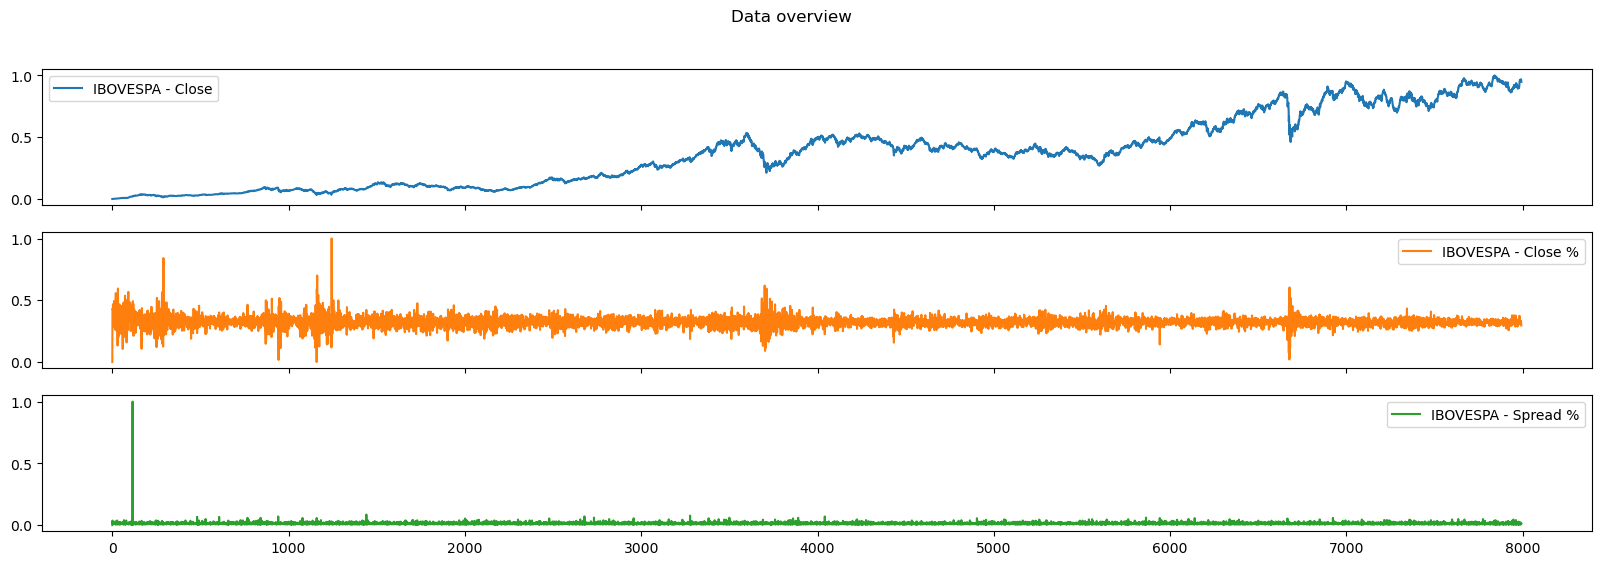

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

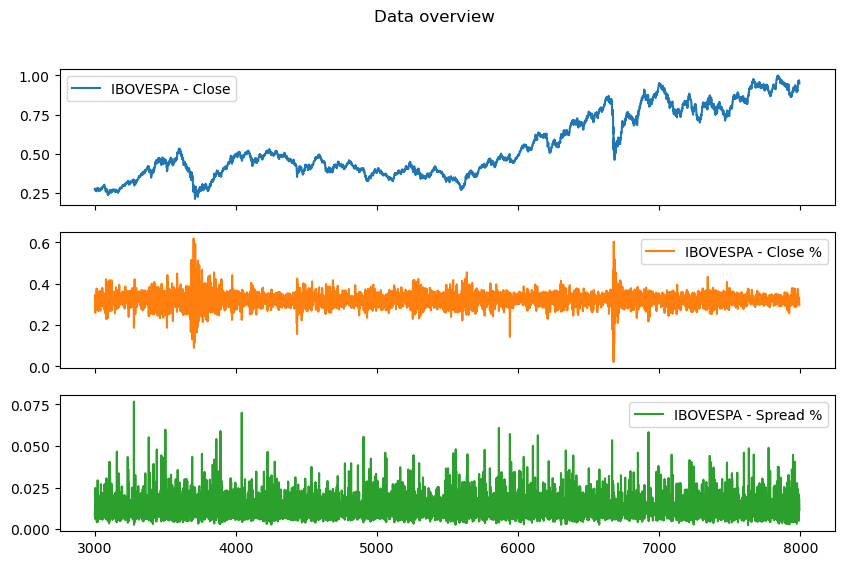

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

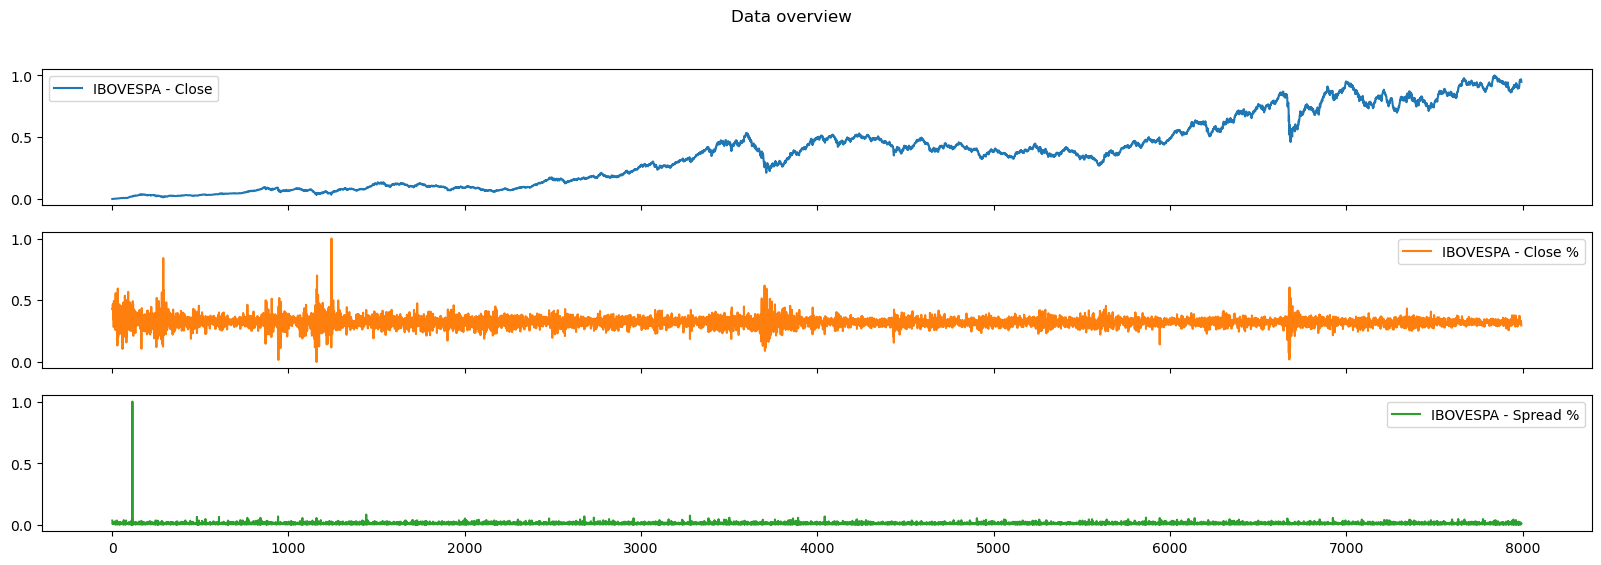

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

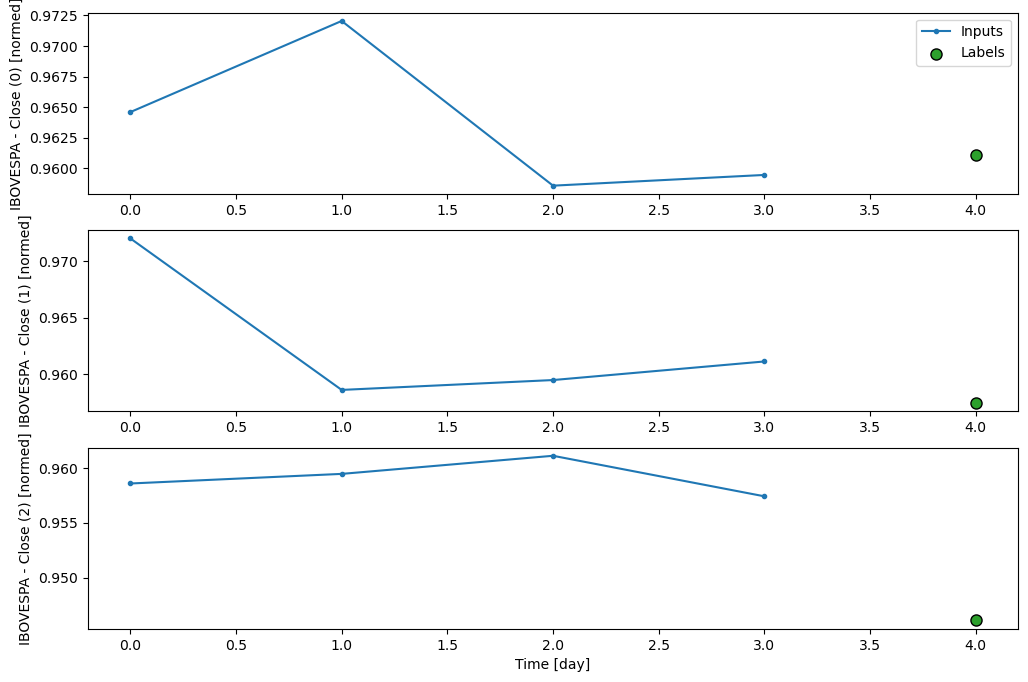

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

3

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9:09 2s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 95.2957 - mean_squared_error: 2.0385e-04 - root_mean_squared_error: 0.0138  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 71.5655 - mean_squared_error: 1.7300e-04 - root_mean_squared_error: 0.0128

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 59.5639 - mean_squared_error: 1.7636e-04 - root_mean_squared_error: 0.0131

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 52.4743 - mean_squared_error: 1.9064e-04 - root_mean_squared_error: 0.0136

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.3640 - mean_squared_error: 1.9946e-04 - root_mean_squared_error: 0.0139

 79/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 43.7804 - mean_squared_error: 2.1492e-04 - root_mean_squared_error: 0.0145

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 41.1346 - mean_squared_error: 2.5183e-04 - root_mean_squared_error: 0.0155

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 38.9274 - mean_squared_error: 2.9359e-04 - root_mean_squared_error: 0.0166

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 37.0332 - mean_squared_error: 3.4947e-04 - root_mean_squared_error: 0.0178

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 35.5979 - mean_squared_error: 5.5725e-04 - root_mean_squared_error: 0.0209

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 34.4636 - mean_squared_error: 8.7749e-04 - root_mean_squared_error: 0.0248

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 33.4479 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0281    

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 32.5953 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0306

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 31.7415 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 30.9793 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0350

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 30.2737 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0368

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 29.6323 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0388

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 29.0422 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0408


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 28.8250 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0416 - val_loss: 0.2074 - val_mean_absolute_error: 0.2074 - val_mean_absolute_percentage_error: 22.3116 - val_mean_squared_error: 0.0443 - val_root_mean_squared_error: 0.2105


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.5917 - mean_absolute_error: 0.5917 - mean_absolute_percentage_error: 25536.6699 - mean_squared_error: 0.3501 - root_mean_squared_error: 0.5917

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5449 - mean_absolute_error: 0.5449 - mean_absolute_percentage_error: 9283.0664 - mean_squared_error: 0.2997 - root_mean_squared_error: 0.5466  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4620 - mean_absolute_error: 0.4620 - mean_absolute_percentage_error: 6213.7710 - mean_squared_error: 0.2378 - root_mean_squared_error: 0.4821

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3920 - mean_absolute_error: 0.3920 - mean_absolute_percentage_error: 4856.8032 - mean_squared_error: 0.1964 - root_mean_squared_error: 0.4328

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 4084.8037 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3985

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 3462.2803 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3670

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 3019.4343 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3422

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 2709.1340 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3234

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 2462.2007 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.3075

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2134 - mean_absolute_error: 0.2134 - mean_absolute_percentage_error: 2245.3125 - mean_squared_error: 0.0996 - root_mean_squared_error: 0.2928

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 2067.0273 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2804

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1890 - mean_absolute_error: 0.1890 - mean_absolute_percentage_error: 1917.5333 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2696

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1795 - mean_absolute_error: 0.1795 - mean_absolute_percentage_error: 1790.1519 - mean_squared_error: 0.0810 - root_mean_squared_error: 0.2601

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 1680.1426 - mean_squared_error: 0.0765 - root_mean_squared_error: 0.2516

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 1584.0833 - mean_squared_error: 0.0724 - root_mean_squared_error: 0.2439

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1572 - mean_absolute_error: 0.1572 - mean_absolute_percentage_error: 1499.4242 - mean_squared_error: 0.0689 - root_mean_squared_error: 0.2370

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 1424.2106 - mean_squared_error: 0.0657 - root_mean_squared_error: 0.2308

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 1356.8783 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2252

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 1296.2139 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2201


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1393 - mean_absolute_error: 0.1393 - mean_absolute_percentage_error: 1253.4663 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2164 - val_loss: 0.0932 - val_mean_absolute_error: 0.0932 - val_mean_absolute_percentage_error: 9.9499 - val_mean_squared_error: 0.0098 - val_root_mean_squared_error: 0.0988


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5749 - mean_absolute_error: 0.5749 - mean_absolute_percentage_error: 24799.8320 - mean_squared_error: 0.3305 - root_mean_squared_error: 0.5749

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5542 - mean_absolute_error: 0.5542 - mean_absolute_percentage_error: 9137.4014 - mean_squared_error: 0.3080 - root_mean_squared_error: 0.5547  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4974 - mean_absolute_error: 0.4974 - mean_absolute_percentage_error: 6220.6118 - mean_squared_error: 0.2607 - root_mean_squared_error: 0.5077

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - mean_absolute_percentage_error: 4827.8774 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4604

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3786 - mean_absolute_error: 0.3786 - mean_absolute_percentage_error: 3986.3875 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.4226

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 3416.8889 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3926

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 3003.1121 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3684

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2790 - mean_absolute_error: 0.2790 - mean_absolute_percentage_error: 2687.3340 - mean_squared_error: 0.1341 - root_mean_squared_error: 0.3482

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 2437.4048 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3311

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 2248.4131 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3175

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 2077.2791 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.3047

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2149 - mean_absolute_error: 0.2149 - mean_absolute_percentage_error: 1943.0653 - mean_squared_error: 0.1002 - root_mean_squared_error: 0.2943

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 1817.7562 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2842

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1943 - mean_absolute_error: 0.1943 - mean_absolute_percentage_error: 1709.1014 - mean_squared_error: 0.0892 - root_mean_squared_error: 0.2751

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 1613.8950 - mean_squared_error: 0.0846 - root_mean_squared_error: 0.2669

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1780 - mean_absolute_error: 0.1780 - mean_absolute_percentage_error: 1529.7152 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2594

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1711 - mean_absolute_error: 0.1711 - mean_absolute_percentage_error: 1454.6824 - mean_squared_error: 0.0769 - root_mean_squared_error: 0.2526

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 1387.3481 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2463

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 1331.0220 - mean_squared_error: 0.0709 - root_mean_squared_error: 0.2410


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 1296.1969 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2377 - val_loss: 0.0215 - val_mean_absolute_error: 0.0215 - val_mean_absolute_percentage_error: 2.3003 - val_mean_squared_error: 6.5927e-04 - val_root_mean_squared_error: 0.0257


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.2547 - mean_absolute_error: 0.2547 - mean_absolute_percentage_error: 10979.8203 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2547

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 3697.3665 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.2090  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1540 - mean_absolute_error: 0.1540 - mean_absolute_percentage_error: 2436.2188 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1728

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1299 - mean_absolute_error: 0.1299 - mean_absolute_percentage_error: 1928.2639 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1536

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 1587.0098 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1387

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0975 - mean_absolute_error: 0.0975 - mean_absolute_percentage_error: 1341.1455 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1268

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 1166.8549 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1176

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 1036.1782 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1102

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 934.1760 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1042 

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 857.8423 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0994

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 784.4882 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0947

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 731.7634 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0912

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 682.7697 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0878

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 640.4747 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0848

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 603.5563 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0821

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 573.3875 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0799

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 544.2243 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0776

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 518.1396 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0756

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 494.6544 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0738


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 479.7179 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0726 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2505 - val_mean_squared_error: 2.0439e-04 - val_root_mean_squared_error: 0.0143


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 4409.5176 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.1023

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 1428.9523 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745 

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 953.0032 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0639 

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 733.0674 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0568

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 602.9900 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0517

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 521.4144 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0481

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 465.5969 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0455

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 421.6417 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0432

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 386.0099 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 358.9542 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0398

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 333.6711 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 310.2590 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 288.6925 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 271.5367 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 257.6763 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 244.2370 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 232.2612 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 221.5152 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 211.0502 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 201.6308 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 194.9977 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8520 - val_mean_squared_error: 9.5198e-05 - val_root_mean_squared_error: 0.0098


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 4119.1821 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0955

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 1392.6899 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0697 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 978.5613 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0599 

 36/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 728.4026 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0527

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 597.4466 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0480

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 503.9110 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 437.9585 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 388.6727 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0387

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 352.9350 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 321.6046 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 297.7098 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 277.4775 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 258.7383 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 242.5962 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 228.5310 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 216.1555 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 205.1723 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 195.3525 - mean_squared_error: 9.8068e-04 - root_mean_squared_error: 0.0284

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 187.1641 - mean_squared_error: 9.4775e-04 - root_mean_squared_error: 0.0279


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 179.1065 - mean_squared_error: 9.1530e-04 - root_mean_squared_error: 0.0274 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0207 - val_mean_squared_error: 1.3410e-04 - val_root_mean_squared_error: 0.0116


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 3437.8218 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0797

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 1110.3103 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 752.9996 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0482 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 572.3745 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0422

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 467.4573 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 398.0269 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 348.3229 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 310.7345 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 281.1769 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 257.2545 - mean_squared_error: 9.5467e-04 - root_mean_squared_error: 0.0281

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 238.8741 - mean_squared_error: 8.9701e-04 - root_mean_squared_error: 0.0272

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 223.2053 - mean_squared_error: 8.5086e-04 - root_mean_squared_error: 0.0264

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 208.6111 - mean_squared_error: 8.0740e-04 - root_mean_squared_error: 0.0258

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 195.9842 - mean_squared_error: 7.6912e-04 - root_mean_squared_error: 0.0251

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 184.9439 - mean_squared_error: 7.3538e-04 - root_mean_squared_error: 0.0246

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 175.2014 - mean_squared_error: 7.0562e-04 - root_mean_squared_error: 0.0241

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 167.1673 - mean_squared_error: 6.8168e-04 - root_mean_squared_error: 0.0237

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 159.3364 - mean_squared_error: 6.5917e-04 - root_mean_squared_error: 0.0233

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 152.7945 - mean_squared_error: 6.4074e-04 - root_mean_squared_error: 0.0230


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 148.2656 - mean_squared_error: 6.2798e-04 - root_mean_squared_error: 0.0228 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9287 - val_mean_squared_error: 1.1593e-04 - val_root_mean_squared_error: 0.0108


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 5616.9487 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1302

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 2146.4907 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1073 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 1371.9413 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0896

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 1002.2930 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0777

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 813.4807 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0701 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 689.6828 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0645

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 607.4673 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0604

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 539.8499 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0568

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 487.0448 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0538

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 444.5315 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0512

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 411.9756 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 382.1775 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0473

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 356.7782 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 334.8399 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 315.6820 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 298.7930 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0417

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 284.8757 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 271.3245 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 260.0188 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0389


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 250.5305 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0382 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7251 - val_mean_squared_error: 6.7704e-05 - val_root_mean_squared_error: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 3119.7075 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0723

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 1006.6797 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0515 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 678.3069 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427 

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 514.0439 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 419.1273 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 356.4388 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 311.6620 - mean_squared_error: 9.7760e-04 - root_mean_squared_error: 0.0286

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 277.8328 - mean_squared_error: 8.7821e-04 - root_mean_squared_error: 0.0269

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 253.0965 - mean_squared_error: 8.0513e-04 - root_mean_squared_error: 0.0256

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 231.2677 - mean_squared_error: 7.4097e-04 - root_mean_squared_error: 0.0244

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 214.5252 - mean_squared_error: 6.9318e-04 - root_mean_squared_error: 0.0236

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 199.1782 - mean_squared_error: 6.5065e-04 - root_mean_squared_error: 0.0228

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 186.0775 - mean_squared_error: 6.1419e-04 - root_mean_squared_error: 0.0221

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 174.7475 - mean_squared_error: 5.8228e-04 - root_mean_squared_error: 0.0215

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 165.5612 - mean_squared_error: 5.5622e-04 - root_mean_squared_error: 0.0210

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 156.7411 - mean_squared_error: 5.3111e-04 - root_mean_squared_error: 0.0205

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 148.9003 - mean_squared_error: 5.0904e-04 - root_mean_squared_error: 0.0201

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 142.3951 - mean_squared_error: 4.9164e-04 - root_mean_squared_error: 0.0197

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 136.0213 - mean_squared_error: 4.7536e-04 - root_mean_squared_error: 0.0194


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 131.9660 - mean_squared_error: 4.6513e-04 - root_mean_squared_error: 0.0192 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0086 - val_mean_squared_error: 1.3062e-04 - val_root_mean_squared_error: 0.0114


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 2733.1814 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0634

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 882.2213 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0452  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 581.2614 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 443.8385 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0326

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 368.4104 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 313.3345 - mean_squared_error: 8.6598e-04 - root_mean_squared_error: 0.0272

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 279.3043 - mean_squared_error: 7.7887e-04 - root_mean_squared_error: 0.0256

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 250.4707 - mean_squared_error: 7.0420e-04 - root_mean_squared_error: 0.0242

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 227.5606 - mean_squared_error: 6.4450e-04 - root_mean_squared_error: 0.0230

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 207.4608 - mean_squared_error: 5.9229e-04 - root_mean_squared_error: 0.0220

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 190.9474 - mean_squared_error: 5.5059e-04 - root_mean_squared_error: 0.0211

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 177.1165 - mean_squared_error: 5.1715e-04 - root_mean_squared_error: 0.0204

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 165.3365 - mean_squared_error: 4.8871e-04 - root_mean_squared_error: 0.0199

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 154.4416 - mean_squared_error: 4.6205e-04 - root_mean_squared_error: 0.0193

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 145.6546 - mean_squared_error: 4.4036e-04 - root_mean_squared_error: 0.0188

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 137.9072 - mean_squared_error: 4.2123e-04 - root_mean_squared_error: 0.0184

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 131.5240 - mean_squared_error: 4.0587e-04 - root_mean_squared_error: 0.0181

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 125.3080 - mean_squared_error: 3.9169e-04 - root_mean_squared_error: 0.0178

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 120.1198 - mean_squared_error: 3.8030e-04 - root_mean_squared_error: 0.0175


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 116.1461 - mean_squared_error: 3.7167e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6736 - val_mean_squared_error: 6.0335e-05 - val_root_mean_squared_error: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 2432.8960 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 777.6474 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 511.4127 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 390.5685 - mean_squared_error: 9.0238e-04 - root_mean_squared_error: 0.0284

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 319.6774 - mean_squared_error: 7.5175e-04 - root_mean_squared_error: 0.0256

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 269.4438 - mean_squared_error: 6.4182e-04 - root_mean_squared_error: 0.0234

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 236.2440 - mean_squared_error: 5.6764e-04 - root_mean_squared_error: 0.0218

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 210.9919 - mean_squared_error: 5.1049e-04 - root_mean_squared_error: 0.0205

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 191.0647 - mean_squared_error: 4.6507e-04 - root_mean_squared_error: 0.0194

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 173.7810 - mean_squared_error: 4.2611e-04 - root_mean_squared_error: 0.0185

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 161.4991 - mean_squared_error: 3.9883e-04 - root_mean_squared_error: 0.0178

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 150.1844 - mean_squared_error: 3.7368e-04 - root_mean_squared_error: 0.0172

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 140.4914 - mean_squared_error: 3.5213e-04 - root_mean_squared_error: 0.0167

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 132.0853 - mean_squared_error: 3.3339e-04 - root_mean_squared_error: 0.0162

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 125.2535 - mean_squared_error: 3.1815e-04 - root_mean_squared_error: 0.0158

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 118.6791 - mean_squared_error: 3.0347e-04 - root_mean_squared_error: 0.0154

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 112.8226 - mean_squared_error: 2.9055e-04 - root_mean_squared_error: 0.0150

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 107.5707 - mean_squared_error: 2.7968e-04 - root_mean_squared_error: 0.0148

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 102.8307 - mean_squared_error: 2.7010e-04 - root_mean_squared_error: 0.0145


Epoch: 11 - LR: 0.007589389570057392
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 101.4642 - mean_squared_error: 2.6736e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6667 - val_mean_squared_error: 6.0127e-05 - val_root_mean_squared_error: 0.0078


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 1290.5144 - mean_squared_error: 9.0278e-04 - root_mean_squared_error: 0.0300

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 400.6414 - mean_squared_error: 4.4316e-04 - root_mean_squared_error: 0.0207  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 272.4299 - mean_squared_error: 3.4068e-04 - root_mean_squared_error: 0.0180

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 207.6496 - mean_squared_error: 2.7558e-04 - root_mean_squared_error: 0.0160

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 172.4515 - mean_squared_error: 2.3716e-04 - root_mean_squared_error: 0.0147

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 146.8259 - mean_squared_error: 2.0788e-04 - root_mean_squared_error: 0.0137

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 129.7142 - mean_squared_error: 1.8733e-04 - root_mean_squared_error: 0.0129

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 115.5781 - mean_squared_error: 1.6984e-04 - root_mean_squared_error: 0.0122

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 104.5117 - mean_squared_error: 1.5614e-04 - root_mean_squared_error: 0.0117

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 95.5840 - mean_squared_error: 1.4552e-04 - root_mean_squared_error: 0.0113 

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 88.7449 - mean_squared_error: 1.3872e-04 - root_mean_squared_error: 0.0110

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 82.4773 - mean_squared_error: 1.3324e-04 - root_mean_squared_error: 0.0108

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 77.1273 - mean_squared_error: 1.2871e-04 - root_mean_squared_error: 0.0107

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 72.4980 - mean_squared_error: 1.2459e-04 - root_mean_squared_error: 0.0105

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 68.7433 - mean_squared_error: 1.2115e-04 - root_mean_squared_error: 0.0104

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 65.1367 - mean_squared_error: 1.1778e-04 - root_mean_squared_error: 0.0102

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 61.9282 - mean_squared_error: 1.1478e-04 - root_mean_squared_error: 0.0101

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 59.0548 - mean_squared_error: 1.1271e-04 - root_mean_squared_error: 0.0101

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 56.6556 - mean_squared_error: 1.1152e-04 - root_mean_squared_error: 0.0100


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 54.8171 - mean_squared_error: 1.1075e-04 - root_mean_squared_error: 0.0100 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7421 - val_mean_squared_error: 7.0753e-05 - val_root_mean_squared_error: 0.0084


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 1726.9689 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0401

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 536.7919 - mean_squared_error: 7.3327e-04 - root_mean_squared_error: 0.0262

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 351.9666 - mean_squared_error: 5.1568e-04 - root_mean_squared_error: 0.0217

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 269.3834 - mean_squared_error: 4.1395e-04 - root_mean_squared_error: 0.0192

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 223.9973 - mean_squared_error: 3.5376e-04 - root_mean_squared_error: 0.0177

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 190.7458 - mean_squared_error: 3.0755e-04 - root_mean_squared_error: 0.0163

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 166.8963 - mean_squared_error: 2.7319e-04 - root_mean_squared_error: 0.0153

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 148.8548 - mean_squared_error: 2.4664e-04 - root_mean_squared_error: 0.0144

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 137.6719 - mean_squared_error: 2.3003e-04 - root_mean_squared_error: 0.0139

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 134.6727 - mean_squared_error: 2.2557e-04 - root_mean_squared_error: 0.0137

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 131.8159 - mean_squared_error: 2.2133e-04 - root_mean_squared_error: 0.0136

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 128.2113 - mean_squared_error: 2.1605e-04 - root_mean_squared_error: 0.0134

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 125.6491 - mean_squared_error: 2.1233e-04 - root_mean_squared_error: 0.0133

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 123.2000 - mean_squared_error: 2.0889e-04 - root_mean_squared_error: 0.0132

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 120.8563 - mean_squared_error: 2.0565e-04 - root_mean_squared_error: 0.0131

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 118.6105 - mean_squared_error: 2.0258e-04 - root_mean_squared_error: 0.0130

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 116.4562 - mean_squared_error: 1.9965e-04 - root_mean_squared_error: 0.0129

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 110.4863 - mean_squared_error: 1.9159e-04 - root_mean_squared_error: 0.0126

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 108.0459 - mean_squared_error: 1.8829e-04 - root_mean_squared_error: 0.0125

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 103.5086 - mean_squared_error: 1.8220e-04 - root_mean_squared_error: 0.0123

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 97.9197 - mean_squared_error: 1.7473e-04 - root_mean_squared_error: 0.0120 

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 92.5390 - mean_squared_error: 1.6749e-04 - root_mean_squared_error: 0.0118

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 87.4035 - mean_squared_error: 1.6052e-04 - root_mean_squared_error: 0.0115

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 83.1926 - mean_squared_error: 1.5479e-04 - root_mean_squared_error: 0.0113

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 79.1098 - mean_squared_error: 1.4934e-04 - root_mean_squared_error: 0.0111

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 75.4491 - mean_squared_error: 1.4522e-04 - root_mean_squared_error: 0.0110

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 72.3880 - mean_squared_error: 1.4198e-04 - root_mean_squared_error: 0.0109


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 70.9588 - mean_squared_error: 1.4052e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.6968 - val_mean_squared_error: 6.6223e-05 - val_root_mean_squared_error: 0.0081


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 1403.0155 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 433.4147 - mean_squared_error: 4.8053e-04 - root_mean_squared_error: 0.0213

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 291.8216 - mean_squared_error: 3.5145e-04 - root_mean_squared_error: 0.0180

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 222.1796 - mean_squared_error: 2.8596e-04 - root_mean_squared_error: 0.0161

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 184.3565 - mean_squared_error: 2.4658e-04 - root_mean_squared_error: 0.0149

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 156.7751 - mean_squared_error: 2.1568e-04 - root_mean_squared_error: 0.0138

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 138.3759 - mean_squared_error: 1.9401e-04 - root_mean_squared_error: 0.0131

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 123.1937 - mean_squared_error: 1.7558e-04 - root_mean_squared_error: 0.0124

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 112.1360 - mean_squared_error: 1.6200e-04 - root_mean_squared_error: 0.0118

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 102.4051 - mean_squared_error: 1.5023e-04 - root_mean_squared_error: 0.0113

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 94.9623 - mean_squared_error: 1.4213e-04 - root_mean_squared_error: 0.0110 

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 88.1549 - mean_squared_error: 1.3544e-04 - root_mean_squared_error: 0.0108

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 82.7731 - mean_squared_error: 1.3059e-04 - root_mean_squared_error: 0.0106

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 77.7113 - mean_squared_error: 1.2595e-04 - root_mean_squared_error: 0.0104

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 73.2957 - mean_squared_error: 1.2189e-04 - root_mean_squared_error: 0.0103

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 69.4066 - mean_squared_error: 1.1831e-04 - root_mean_squared_error: 0.0102

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 65.9520 - mean_squared_error: 1.1532e-04 - root_mean_squared_error: 0.0101

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 63.0889 - mean_squared_error: 1.1371e-04 - root_mean_squared_error: 0.0100

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 60.2881 - mean_squared_error: 1.1362e-04 - root_mean_squared_error: 0.0100


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 58.1271 - mean_squared_error: 1.1384e-04 - root_mean_squared_error: 0.0101 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7174 - val_mean_squared_error: 7.0425e-05 - val_root_mean_squared_error: 0.0084


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 2583.4517 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0600

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 836.9772 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 551.1395 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 428.6350 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 354.6708 - mean_squared_error: 9.1812e-04 - root_mean_squared_error: 0.0283

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 300.9825 - mean_squared_error: 7.8984e-04 - root_mean_squared_error: 0.0260

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 262.8018 - mean_squared_error: 6.9708e-04 - root_mean_squared_error: 0.0242

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 234.0479 - mean_squared_error: 6.2629e-04 - root_mean_squared_error: 0.0228

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 213.0726 - mean_squared_error: 5.7435e-04 - root_mean_squared_error: 0.0217

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 194.5917 - mean_squared_error: 5.2882e-04 - root_mean_squared_error: 0.0208

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 179.3579 - mean_squared_error: 4.9252e-04 - root_mean_squared_error: 0.0200

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 169.3302 - mean_squared_error: 4.6951e-04 - root_mean_squared_error: 0.0195

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 157.2104 - mean_squared_error: 4.4171e-04 - root_mean_squared_error: 0.0189

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 148.2490 - mean_squared_error: 4.2089e-04 - root_mean_squared_error: 0.0184

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 139.7339 - mean_squared_error: 4.0097e-04 - root_mean_squared_error: 0.0180

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 132.2353 - mean_squared_error: 3.8336e-04 - root_mean_squared_error: 0.0176

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 125.5772 - mean_squared_error: 3.6806e-04 - root_mean_squared_error: 0.0172

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 120.0585 - mean_squared_error: 3.5615e-04 - root_mean_squared_error: 0.0169

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 114.6547 - mean_squared_error: 3.4497e-04 - root_mean_squared_error: 0.0167


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 110.4855 - mean_squared_error: 3.3647e-04 - root_mean_squared_error: 0.0165 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6816 - val_mean_squared_error: 6.0521e-05 - val_root_mean_squared_error: 0.0078


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 2634.4473 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0612

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 983.4453 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 729.3492 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0407

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 606.1260 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 470.2773 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 377.0838 - mean_squared_error: 9.8492e-04 - root_mean_squared_error: 0.0294

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 317.3938 - mean_squared_error: 8.4107e-04 - root_mean_squared_error: 0.0269

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 278.2978 - mean_squared_error: 7.4469e-04 - root_mean_squared_error: 0.0251

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 246.4516 - mean_squared_error: 6.6496e-04 - root_mean_squared_error: 0.0235

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 223.4572 - mean_squared_error: 6.0676e-04 - root_mean_squared_error: 0.0223

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 203.3565 - mean_squared_error: 5.5564e-04 - root_mean_squared_error: 0.0212

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 188.0522 - mean_squared_error: 5.1715e-04 - root_mean_squared_error: 0.0204

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 175.0969 - mean_squared_error: 4.8464e-04 - root_mean_squared_error: 0.0197

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 163.1137 - mean_squared_error: 4.5450e-04 - root_mean_squared_error: 0.0190

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 152.8112 - mean_squared_error: 4.2851e-04 - root_mean_squared_error: 0.0184

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 143.8493 - mean_squared_error: 4.0583e-04 - root_mean_squared_error: 0.0179

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 135.9759 - mean_squared_error: 3.8590e-04 - root_mean_squared_error: 0.0174

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 129.5062 - mean_squared_error: 3.6955e-04 - root_mean_squared_error: 0.0170

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 123.2218 - mean_squared_error: 3.5403e-04 - root_mean_squared_error: 0.0166

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 117.9907 - mean_squared_error: 3.4189e-04 - root_mean_squared_error: 0.0163

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 113.6083 - mean_squared_error: 3.3204e-04 - root_mean_squared_error: 0.0161


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 112.1032 - mean_squared_error: 3.2868e-04 - root_mean_squared_error: 0.0160 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1180 - val_mean_squared_error: 1.5391e-04 - val_root_mean_squared_error: 0.0124


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 2029.3257 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 676.9087 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 436.5719 - mean_squared_error: 8.0333e-04 - root_mean_squared_error: 0.0271

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 331.2093 - mean_squared_error: 6.3035e-04 - root_mean_squared_error: 0.0237

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 270.1158 - mean_squared_error: 5.2410e-04 - root_mean_squared_error: 0.0214

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 229.7059 - mean_squared_error: 4.5172e-04 - root_mean_squared_error: 0.0196

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 200.7906 - mean_squared_error: 3.9880e-04 - root_mean_squared_error: 0.0183

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 180.4453 - mean_squared_error: 3.6113e-04 - root_mean_squared_error: 0.0173

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 167.9558 - mean_squared_error: 3.3797e-04 - root_mean_squared_error: 0.0167

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 156.1559 - mean_squared_error: 3.1630e-04 - root_mean_squared_error: 0.0161

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 145.1365 - mean_squared_error: 2.9679e-04 - root_mean_squared_error: 0.0155

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 136.5265 - mean_squared_error: 2.8263e-04 - root_mean_squared_error: 0.0151

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 126.8969 - mean_squared_error: 2.6741e-04 - root_mean_squared_error: 0.0147

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 119.2525 - mean_squared_error: 2.5529e-04 - root_mean_squared_error: 0.0144

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 112.0421 - mean_squared_error: 2.4364e-04 - root_mean_squared_error: 0.0141

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 105.7358 - mean_squared_error: 2.3335e-04 - root_mean_squared_error: 0.0138

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 100.1692 - mean_squared_error: 2.2427e-04 - root_mean_squared_error: 0.0135

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 95.5776 - mean_squared_error: 2.1705e-04 - root_mean_squared_error: 0.0133 

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 91.1036 - mean_squared_error: 2.1095e-04 - root_mean_squared_error: 0.0132

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 87.0707 - mean_squared_error: 2.0594e-04 - root_mean_squared_error: 0.0131


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 85.0592 - mean_squared_error: 2.0350e-04 - root_mean_squared_error: 0.0130 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 0.9963 - val_mean_squared_error: 1.2677e-04 - val_root_mean_squared_error: 0.0113


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 2049.3289 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 692.7198 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 453.9033 - mean_squared_error: 9.4597e-04 - root_mean_squared_error: 0.0300

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 347.9587 - mean_squared_error: 7.7756e-04 - root_mean_squared_error: 0.0270

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 285.7148 - mean_squared_error: 6.6418e-04 - root_mean_squared_error: 0.0247

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 246.7810 - mean_squared_error: 5.8762e-04 - root_mean_squared_error: 0.0231

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 216.0619 - mean_squared_error: 5.2427e-04 - root_mean_squared_error: 0.0217

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 192.8419 - mean_squared_error: 4.7517e-04 - root_mean_squared_error: 0.0205

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 174.5866 - mean_squared_error: 4.3595e-04 - root_mean_squared_error: 0.0195

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 159.8066 - mean_squared_error: 4.0417e-04 - root_mean_squared_error: 0.0187

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 147.5806 - mean_squared_error: 3.7901e-04 - root_mean_squared_error: 0.0181

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 137.2773 - mean_squared_error: 3.5869e-04 - root_mean_squared_error: 0.0176

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 128.4562 - mean_squared_error: 3.4109e-04 - root_mean_squared_error: 0.0171

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 121.3604 - mean_squared_error: 3.2665e-04 - root_mean_squared_error: 0.0167

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 114.5946 - mean_squared_error: 3.1272e-04 - root_mean_squared_error: 0.0164

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 108.6181 - mean_squared_error: 3.0038e-04 - root_mean_squared_error: 0.0160

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 104.0778 - mean_squared_error: 2.9129e-04 - root_mean_squared_error: 0.0158

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 99.5833 - mean_squared_error: 2.8284e-04 - root_mean_squared_error: 0.0156 

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 95.5003 - mean_squared_error: 2.7555e-04 - root_mean_squared_error: 0.0154


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 92.0714 - mean_squared_error: 2.6952e-04 - root_mean_squared_error: 0.0152 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6725 - val_mean_squared_error: 6.0055e-05 - val_root_mean_squared_error: 0.0077


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 2304.0586 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0535

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 778.9477 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 501.4621 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 386.3938 - mean_squared_error: 8.5780e-04 - root_mean_squared_error: 0.0276

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 313.2883 - mean_squared_error: 7.0633e-04 - root_mean_squared_error: 0.0247

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 265.4378 - mean_squared_error: 6.0494e-04 - root_mean_squared_error: 0.0226

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 235.9838 - mean_squared_error: 5.4147e-04 - root_mean_squared_error: 0.0212

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 214.8509 - mean_squared_error: 4.9548e-04 - root_mean_squared_error: 0.0202

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 192.9192 - mean_squared_error: 4.4744e-04 - root_mean_squared_error: 0.0190

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 175.4241 - mean_squared_error: 4.0911e-04 - root_mean_squared_error: 0.0181

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 161.1141 - mean_squared_error: 3.7840e-04 - root_mean_squared_error: 0.0173

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 149.1655 - mean_squared_error: 3.5295e-04 - root_mean_squared_error: 0.0167

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 139.0211 - mean_squared_error: 3.3137e-04 - root_mean_squared_error: 0.0161

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 130.2900 - mean_squared_error: 3.1279e-04 - root_mean_squared_error: 0.0156

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 122.6887 - mean_squared_error: 2.9659e-04 - root_mean_squared_error: 0.0152

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 116.0056 - mean_squared_error: 2.8238e-04 - root_mean_squared_error: 0.0148

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 110.5107 - mean_squared_error: 2.7079e-04 - root_mean_squared_error: 0.0145

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 105.1714 - mean_squared_error: 2.6015e-04 - root_mean_squared_error: 0.0142

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 100.3745 - mean_squared_error: 2.5183e-04 - root_mean_squared_error: 0.0140


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 96.3568 - mean_squared_error: 2.4523e-04 - root_mean_squared_error: 0.0138 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6605 - val_mean_squared_error: 5.6817e-05 - val_root_mean_squared_error: 0.0075


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 1861.8245 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 630.9147 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320  

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 414.0272 - mean_squared_error: 7.9581e-04 - root_mean_squared_error: 0.0275

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 317.4059 - mean_squared_error: 6.5265e-04 - root_mean_squared_error: 0.0247

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 264.1463 - mean_squared_error: 5.6289e-04 - root_mean_squared_error: 0.0228

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 225.0654 - mean_squared_error: 4.9202e-04 - root_mean_squared_error: 0.0211

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 198.9112 - mean_squared_error: 4.4231e-04 - root_mean_squared_error: 0.0199

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 177.2868 - mean_squared_error: 4.0007e-04 - root_mean_squared_error: 0.0188

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 160.3349 - mean_squared_error: 3.6651e-04 - root_mean_squared_error: 0.0179

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 146.6426 - mean_squared_error: 3.3953e-04 - root_mean_squared_error: 0.0171

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 135.3338 - mean_squared_error: 3.1811e-04 - root_mean_squared_error: 0.0166

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 125.8154 - mean_squared_error: 3.0066e-04 - root_mean_squared_error: 0.0161

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 117.6777 - mean_squared_error: 2.8579e-04 - root_mean_squared_error: 0.0157

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 110.6293 - mean_squared_error: 2.7267e-04 - root_mean_squared_error: 0.0153

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 104.4603 - mean_squared_error: 2.6106e-04 - root_mean_squared_error: 0.0149

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 99.0123 - mean_squared_error: 2.5088e-04 - root_mean_squared_error: 0.0146 

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 94.1624 - mean_squared_error: 2.4216e-04 - root_mean_squared_error: 0.0144

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 89.8140 - mean_squared_error: 2.3504e-04 - root_mean_squared_error: 0.0142

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 85.8901 - mean_squared_error: 2.2899e-04 - root_mean_squared_error: 0.0140


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 83.9316 - mean_squared_error: 2.2604e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9288 - val_mean_squared_error: 1.1428e-04 - val_root_mean_squared_error: 0.0107


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 2136.9756 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 690.8204 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 452.9573 - mean_squared_error: 9.1017e-04 - root_mean_squared_error: 0.0288

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 351.4315 - mean_squared_error: 7.2205e-04 - root_mean_squared_error: 0.0253

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 286.1841 - mean_squared_error: 5.9666e-04 - root_mean_squared_error: 0.0226

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 248.7999 - mean_squared_error: 5.2341e-04 - root_mean_squared_error: 0.0210

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 220.9128 - mean_squared_error: 4.6813e-04 - root_mean_squared_error: 0.0197

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 197.4648 - mean_squared_error: 4.2123e-04 - root_mean_squared_error: 0.0186

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 178.9496 - mean_squared_error: 3.8404e-04 - root_mean_squared_error: 0.0176

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 162.7884 - mean_squared_error: 3.5176e-04 - root_mean_squared_error: 0.0168

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 150.4965 - mean_squared_error: 3.2791e-04 - root_mean_squared_error: 0.0162

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 139.3074 - mean_squared_error: 3.0666e-04 - root_mean_squared_error: 0.0156

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 130.4966 - mean_squared_error: 2.9019e-04 - root_mean_squared_error: 0.0152

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 122.2424 - mean_squared_error: 2.7474e-04 - root_mean_squared_error: 0.0147

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 115.0653 - mean_squared_error: 2.6125e-04 - root_mean_squared_error: 0.0144

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 108.7621 - mean_squared_error: 2.4939e-04 - root_mean_squared_error: 0.0140

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 103.1774 - mean_squared_error: 2.3896e-04 - root_mean_squared_error: 0.0137

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 98.1929 - mean_squared_error: 2.3025e-04 - root_mean_squared_error: 0.0135 

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 93.7154 - mean_squared_error: 2.2344e-04 - root_mean_squared_error: 0.0133


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 89.6681 - mean_squared_error: 2.1766e-04 - root_mean_squared_error: 0.0132 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6693 - val_mean_squared_error: 5.8247e-05 - val_root_mean_squared_error: 0.0076


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 1630.6909 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0380

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 520.9253 - mean_squared_error: 7.2586e-04 - root_mean_squared_error: 0.0262

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 343.2266 - mean_squared_error: 5.1456e-04 - root_mean_squared_error: 0.0217

 40/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 263.0540 - mean_squared_error: 4.1151e-04 - root_mean_squared_error: 0.0192

 53/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 216.0136 - mean_squared_error: 3.4731e-04 - root_mean_squared_error: 0.0175

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 184.5266 - mean_squared_error: 3.0227e-04 - root_mean_squared_error: 0.0162

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 163.3490 - mean_squared_error: 2.7105e-04 - root_mean_squared_error: 0.0153

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 145.7639 - mean_squared_error: 2.4466e-04 - root_mean_squared_error: 0.0144

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 131.9304 - mean_squared_error: 2.2371e-04 - root_mean_squared_error: 0.0137

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 120.7320 - mean_squared_error: 2.0709e-04 - root_mean_squared_error: 0.0131

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 111.4702 - mean_squared_error: 1.9418e-04 - root_mean_squared_error: 0.0127

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 103.6620 - mean_squared_error: 1.8356e-04 - root_mean_squared_error: 0.0123

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 97.4601 - mean_squared_error: 1.7521e-04 - root_mean_squared_error: 0.0121 

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 91.6070 - mean_squared_error: 1.6723e-04 - root_mean_squared_error: 0.0118

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 86.4852 - mean_squared_error: 1.6023e-04 - root_mean_squared_error: 0.0115

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 81.9611 - mean_squared_error: 1.5404e-04 - root_mean_squared_error: 0.0113

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 78.2269 - mean_squared_error: 1.4905e-04 - root_mean_squared_error: 0.0111

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 74.5876 - mean_squared_error: 1.4522e-04 - root_mean_squared_error: 0.0110

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 71.3075 - mean_squared_error: 1.4260e-04 - root_mean_squared_error: 0.0110


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 69.6712 - mean_squared_error: 1.4140e-04 - root_mean_squared_error: 0.0109 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7284 - val_mean_squared_error: 6.8979e-05 - val_root_mean_squared_error: 0.0083


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 1511.0544 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0352

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 504.0265 - mean_squared_error: 6.4064e-04 - root_mean_squared_error: 0.0247

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 321.9277 - mean_squared_error: 4.3091e-04 - root_mean_squared_error: 0.0197

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 242.8826 - mean_squared_error: 3.3252e-04 - root_mean_squared_error: 0.0170

 51/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 200.4142 - mean_squared_error: 2.7828e-04 - root_mean_squared_error: 0.0154

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 178.0011 - mean_squared_error: 2.4924e-04 - root_mean_squared_error: 0.0145

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 153.9550 - mean_squared_error: 2.1760e-04 - root_mean_squared_error: 0.0134

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 136.1595 - mean_squared_error: 1.9389e-04 - root_mean_squared_error: 0.0126

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 123.3432 - mean_squared_error: 1.7675e-04 - root_mean_squared_error: 0.0119

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 112.1646 - mean_squared_error: 1.6199e-04 - root_mean_squared_error: 0.0114

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 103.6717 - mean_squared_error: 1.5151e-04 - root_mean_squared_error: 0.0110

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 96.4935 - mean_squared_error: 1.4296e-04 - root_mean_squared_error: 0.0107 

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 90.3366 - mean_squared_error: 1.3575e-04 - root_mean_squared_error: 0.0104

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 84.5779 - mean_squared_error: 1.2907e-04 - root_mean_squared_error: 0.0101

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 79.5775 - mean_squared_error: 1.2327e-04 - root_mean_squared_error: 0.0099

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 75.1913 - mean_squared_error: 1.1821e-04 - root_mean_squared_error: 0.0097

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 71.5917 - mean_squared_error: 1.1412e-04 - root_mean_squared_error: 0.0096

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 68.0997 - mean_squared_error: 1.1055e-04 - root_mean_squared_error: 0.0094

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 64.9682 - mean_squared_error: 1.0848e-04 - root_mean_squared_error: 0.0094

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 62.1412 - mean_squared_error: 1.0713e-04 - root_mean_squared_error: 0.0094


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 61.7308 - mean_squared_error: 1.0695e-04 - root_mean_squared_error: 0.0094 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7305 - val_mean_squared_error: 6.9144e-05 - val_root_mean_squared_error: 0.0083


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 1392.3333 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 488.0896 - mean_squared_error: 5.7094e-04 - root_mean_squared_error: 0.0234

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 316.6480 - mean_squared_error: 4.0177e-04 - root_mean_squared_error: 0.0193

 37/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 236.5395 - mean_squared_error: 3.1241e-04 - root_mean_squared_error: 0.0168

 50/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 191.4778 - mean_squared_error: 2.5884e-04 - root_mean_squared_error: 0.0151

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 164.0009 - mean_squared_error: 2.2501e-04 - root_mean_squared_error: 0.0139

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 142.6604 - mean_squared_error: 1.9808e-04 - root_mean_squared_error: 0.0130

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 127.7935 - mean_squared_error: 1.7906e-04 - root_mean_squared_error: 0.0123

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 115.1349 - mean_squared_error: 1.6277e-04 - root_mean_squared_error: 0.0116

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 104.9803 - mean_squared_error: 1.4992e-04 - root_mean_squared_error: 0.0111

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 96.6412 - mean_squared_error: 1.4013e-04 - root_mean_squared_error: 0.0107 

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 89.6517 - mean_squared_error: 1.3211e-04 - root_mean_squared_error: 0.0104

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 83.6992 - mean_squared_error: 1.2535e-04 - root_mean_squared_error: 0.0101

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 78.5623 - mean_squared_error: 1.1951e-04 - root_mean_squared_error: 0.0099

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 74.0804 - mean_squared_error: 1.1444e-04 - root_mean_squared_error: 0.0097

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 70.4190 - mean_squared_error: 1.1033e-04 - root_mean_squared_error: 0.0095

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 66.8798 - mean_squared_error: 1.0647e-04 - root_mean_squared_error: 0.0094

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 63.7161 - mean_squared_error: 1.0379e-04 - root_mean_squared_error: 0.0093

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 60.8706 - mean_squared_error: 1.0243e-04 - root_mean_squared_error: 0.0093


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 58.8675 - mean_squared_error: 1.0167e-04 - root_mean_squared_error: 0.0093 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6789 - val_mean_squared_error: 6.0380e-05 - val_root_mean_squared_error: 0.0078


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 1252.9720 - mean_squared_error: 8.6367e-04 - root_mean_squared_error: 0.0294

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 401.9437 - mean_squared_error: 4.4832e-04 - root_mean_squared_error: 0.0208  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 268.1971 - mean_squared_error: 3.3905e-04 - root_mean_squared_error: 0.0179

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 213.8837 - mean_squared_error: 2.8462e-04 - root_mean_squared_error: 0.0163

 49/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 179.7679 - mean_squared_error: 2.4756e-04 - root_mean_squared_error: 0.0151

 62/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 152.3848 - mean_squared_error: 2.1580e-04 - root_mean_squared_error: 0.0140

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 132.9771 - mean_squared_error: 1.9222e-04 - root_mean_squared_error: 0.0131

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 119.4061 - mean_squared_error: 1.7527e-04 - root_mean_squared_error: 0.0124

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 108.6142 - mean_squared_error: 1.6165e-04 - root_mean_squared_error: 0.0119

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 99.7982 - mean_squared_error: 1.5056e-04 - root_mean_squared_error: 0.0114 

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 91.8924 - mean_squared_error: 1.4126e-04 - root_mean_squared_error: 0.0111

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 85.7416 - mean_squared_error: 1.3425e-04 - root_mean_squared_error: 0.0108

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 80.0363 - mean_squared_error: 1.2784e-04 - root_mean_squared_error: 0.0105

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 75.1182 - mean_squared_error: 1.2229e-04 - root_mean_squared_error: 0.0103

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 70.8305 - mean_squared_error: 1.1743e-04 - root_mean_squared_error: 0.0101

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 67.3303 - mean_squared_error: 1.1346e-04 - root_mean_squared_error: 0.0099

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 63.9484 - mean_squared_error: 1.0967e-04 - root_mean_squared_error: 0.0098

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 61.1468 - mean_squared_error: 1.0695e-04 - root_mean_squared_error: 0.0096

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 58.8112 - mean_squared_error: 1.0557e-04 - root_mean_squared_error: 0.0096

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 56.2966 - mean_squared_error: 1.0463e-04 - root_mean_squared_error: 0.0096


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 55.7505 - mean_squared_error: 1.0445e-04 - root_mean_squared_error: 0.0096 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7577 - val_mean_squared_error: 7.4080e-05 - val_root_mean_squared_error: 0.0086


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 1262.6040 - mean_squared_error: 8.7204e-04 - root_mean_squared_error: 0.0295

 14/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 404.7805 - mean_squared_error: 4.4708e-04 - root_mean_squared_error: 0.0207  

 27/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 269.6408 - mean_squared_error: 3.3581e-04 - root_mean_squared_error: 0.0178

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 211.1105 - mean_squared_error: 2.7703e-04 - root_mean_squared_error: 0.0160

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 173.0974 - mean_squared_error: 2.3529e-04 - root_mean_squared_error: 0.0146

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 147.7620 - mean_squared_error: 2.0573e-04 - root_mean_squared_error: 0.0136

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 130.7470 - mean_squared_error: 1.8502e-04 - root_mean_squared_error: 0.0128

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 116.6345 - mean_squared_error: 1.6738e-04 - root_mean_squared_error: 0.0121

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 106.3149 - mean_squared_error: 1.5434e-04 - root_mean_squared_error: 0.0115

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 97.2086 - mean_squared_error: 1.4312e-04 - root_mean_squared_error: 0.0111 

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 89.6954 - mean_squared_error: 1.3467e-04 - root_mean_squared_error: 0.0107

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 83.3717 - mean_squared_error: 1.2767e-04 - root_mean_squared_error: 0.0105

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 78.3556 - mean_squared_error: 1.2216e-04 - root_mean_squared_error: 0.0102

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.6278 - mean_squared_error: 1.1693e-04 - root_mean_squared_error: 0.0100

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 69.4951 - mean_squared_error: 1.1234e-04 - root_mean_squared_error: 0.0098

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 65.8483 - mean_squared_error: 1.0831e-04 - root_mean_squared_error: 0.0096

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 62.8402 - mean_squared_error: 1.0505e-04 - root_mean_squared_error: 0.0095

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 59.9093 - mean_squared_error: 1.0243e-04 - root_mean_squared_error: 0.0094

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 57.4625 - mean_squared_error: 1.0069e-04 - root_mean_squared_error: 0.0093


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 55.5878 - mean_squared_error: 9.9487e-05 - root_mean_squared_error: 0.0093 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8099 - val_mean_squared_error: 8.7746e-05 - val_root_mean_squared_error: 0.0094


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 1282.9021 - mean_squared_error: 9.0207e-04 - root_mean_squared_error: 0.0300

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 429.1647 - mean_squared_error: 4.7353e-04 - root_mean_squared_error: 0.0213  

 24/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 294.2682 - mean_squared_error: 3.5833e-04 - root_mean_squared_error: 0.0184

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 229.3555 - mean_squared_error: 2.9310e-04 - root_mean_squared_error: 0.0164

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 184.6202 - mean_squared_error: 2.4444e-04 - root_mean_squared_error: 0.0149

 61/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 155.8766 - mean_squared_error: 2.1164e-04 - root_mean_squared_error: 0.0137

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 135.6642 - mean_squared_error: 1.8773e-04 - root_mean_squared_error: 0.0128

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 121.6104 - mean_squared_error: 1.7077e-04 - root_mean_squared_error: 0.0122

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 109.6412 - mean_squared_error: 1.5612e-04 - root_mean_squared_error: 0.0116

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 100.0374 - mean_squared_error: 1.4454e-04 - root_mean_squared_error: 0.0111

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 92.1479 - mean_squared_error: 1.3584e-04 - root_mean_squared_error: 0.0108 

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 85.5368 - mean_squared_error: 1.2901e-04 - root_mean_squared_error: 0.0105

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 80.3092 - mean_squared_error: 1.2379e-04 - root_mean_squared_error: 0.0103

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 75.3932 - mean_squared_error: 1.1880e-04 - root_mean_squared_error: 0.0101

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 71.1049 - mean_squared_error: 1.1440e-04 - root_mean_squared_error: 0.0099

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 67.3281 - mean_squared_error: 1.1053e-04 - root_mean_squared_error: 0.0098

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 63.9732 - mean_squared_error: 1.0720e-04 - root_mean_squared_error: 0.0096

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 61.1922 - mean_squared_error: 1.0496e-04 - root_mean_squared_error: 0.0096

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 58.6697 - mean_squared_error: 1.0356e-04 - root_mean_squared_error: 0.0095


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 56.1869 - mean_squared_error: 1.0243e-04 - root_mean_squared_error: 0.0095 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6735 - val_mean_squared_error: 5.9338e-05 - val_root_mean_squared_error: 0.0077


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 1414.1621 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

 13/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 472.9084 - mean_squared_error: 5.6823e-04 - root_mean_squared_error: 0.0232

 26/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 305.1178 - mean_squared_error: 3.9621e-04 - root_mean_squared_error: 0.0191

 39/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 232.2862 - mean_squared_error: 3.1788e-04 - root_mean_squared_error: 0.0169

 52/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 190.0567 - mean_squared_error: 2.6870e-04 - root_mean_squared_error: 0.0155

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 161.9986 - mean_squared_error: 2.3418e-04 - root_mean_squared_error: 0.0143

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 141.8673 - mean_squared_error: 2.0848e-04 - root_mean_squared_error: 0.0134

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 126.6219 - mean_squared_error: 1.8857e-04 - root_mean_squared_error: 0.0127

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 114.6278 - mean_squared_error: 1.7277e-04 - root_mean_squared_error: 0.0121

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 104.9179 - mean_squared_error: 1.6035e-04 - root_mean_squared_error: 0.0116

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 96.8849 - mean_squared_error: 1.5074e-04 - root_mean_squared_error: 0.0113 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 90.1113 - mean_squared_error: 1.4282e-04 - root_mean_squared_error: 0.0110

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 84.7304 - mean_squared_error: 1.3659e-04 - root_mean_squared_error: 0.0107

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 79.6520 - mean_squared_error: 1.3066e-04 - root_mean_squared_error: 0.0105

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 75.2079 - mean_squared_error: 1.2545e-04 - root_mean_squared_error: 0.0103

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 71.2819 - mean_squared_error: 1.2085e-04 - root_mean_squared_error: 0.0101

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 67.7859 - mean_squared_error: 1.1689e-04 - root_mean_squared_error: 0.0099

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 64.6532 - mean_squared_error: 1.1427e-04 - root_mean_squared_error: 0.0099

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 61.8275 - mean_squared_error: 1.1244e-04 - root_mean_squared_error: 0.0098


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 60.6145 - mean_squared_error: 1.1172e-04 - root_mean_squared_error: 0.0098 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6859 - val_mean_squared_error: 6.1434e-05 - val_root_mean_squared_error: 0.0078


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 1394.1609 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0326

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 490.4668 - mean_squared_error: 5.8031e-04 - root_mean_squared_error: 0.0235

 23/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 327.0373 - mean_squared_error: 4.1607e-04 - root_mean_squared_error: 0.0196

 35/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 247.3844 - mean_squared_error: 3.3028e-04 - root_mean_squared_error: 0.0173

 48/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 198.9021 - mean_squared_error: 2.7480e-04 - root_mean_squared_error: 0.0157

 60/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 169.7313 - mean_squared_error: 2.3945e-04 - root_mean_squared_error: 0.0145

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 147.2534 - mean_squared_error: 2.1120e-04 - root_mean_squared_error: 0.0135

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 131.6834 - mean_squared_error: 1.9115e-04 - root_mean_squared_error: 0.0128

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 118.4797 - mean_squared_error: 1.7396e-04 - root_mean_squared_error: 0.0121

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 107.9223 - mean_squared_error: 1.6034e-04 - root_mean_squared_error: 0.0116

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 99.2720 - mean_squared_error: 1.4992e-04 - root_mean_squared_error: 0.0112 

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 92.0363 - mean_squared_error: 1.4142e-04 - root_mean_squared_error: 0.0109

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 85.8830 - mean_squared_error: 1.3424e-04 - root_mean_squared_error: 0.0106

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 80.5788 - mean_squared_error: 1.2800e-04 - root_mean_squared_error: 0.0103

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 75.9551 - mean_squared_error: 1.2255e-04 - root_mean_squared_error: 0.0101

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 71.8853 - mean_squared_error: 1.1776e-04 - root_mean_squared_error: 0.0099

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 68.2717 - mean_squared_error: 1.1358e-04 - root_mean_squared_error: 0.0098

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 65.0409 - mean_squared_error: 1.1039e-04 - root_mean_squared_error: 0.0096

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 62.3478 - mean_squared_error: 1.0845e-04 - root_mean_squared_error: 0.0096


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 59.8925 - mean_squared_error: 1.0692e-04 - root_mean_squared_error: 0.0095 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6813 - val_mean_squared_error: 6.0661e-05 - val_root_mean_squared_error: 0.0078


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:35s:450ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 19:10:29.181247: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 19:09:44',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:35s:450ms',
 'TRAINING_EPOCHS': 29,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 19:10:29.443596: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 1091.1152 - mean_squared_error: 6.5510e-04 - root_mean_squared_error: 0.0256

 19/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 335.0433 - mean_squared_error: 6.2669e-04 - root_mean_squared_error: 0.0250  

 34/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 244.8793 - mean_squared_error: 6.0713e-04 - root_mean_squared_error: 0.0246

 45/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 208.9539 - mean_squared_error: 5.9315e-04 - root_mean_squared_error: 0.0243

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 178.3681 - mean_squared_error: 5.7499e-04 - root_mean_squared_error: 0.0240

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 158.4449 - mean_squared_error: 5.6069e-04 - root_mean_squared_error: 0.0237

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 143.4274 - mean_squared_error: 5.4814e-04 - root_mean_squared_error: 0.0234

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 129.7928 - mean_squared_error: 5.3276e-04 - root_mean_squared_error: 0.0230

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 116.8987 - mean_squared_error: 5.1377e-04 - root_mean_squared_error: 0.0226

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 110.3701 - mean_squared_error: 5.0298e-04 - root_mean_squared_error: 0.0224

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 101.7728 - mean_squared_error: 4.8713e-04 - root_mean_squared_error: 0.0220

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 94.1975 - mean_squared_error: 4.7164e-04 - root_mean_squared_error: 0.0216 

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 87.8179 - mean_squared_error: 4.5750e-04 - root_mean_squared_error: 0.0213

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 82.3589 - mean_squared_error: 4.4465e-04 - root_mean_squared_error: 0.0210

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 77.6226 - mean_squared_error: 4.3347e-04 - root_mean_squared_error: 0.0207

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 73.9032 - mean_squared_error: 4.2456e-04 - root_mean_squared_error: 0.0205

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 72.8234 - mean_squared_error: 4.2192e-04 - root_mean_squared_error: 0.0204


Loss: 0.015584180131554604 - MAE: 0.015584180131554604 - MSE: 0.000297408812912181 - MAPE: 22.21202278137207 - RMSE: 0.017245544120669365


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 0.9588 - mean_squared_error: 9.7215e-05 - root_mean_squared_error: 0.0099

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 0.7341 - mean_squared_error: 6.8255e-05 - root_mean_squared_error: 0.0082 


Loss: 0.006240034010261297 - MAE: 0.006240034010261297 - MSE: 6.066138303140178e-05 - MAPE: 0.6812624335289001 - RMSE: 0.007788541726768017


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 0.5477 - mean_squared_error: 4.3204e-05 - root_mean_squared_error: 0.0066

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 0.7797 - mean_squared_error: 8.9073e-05 - root_mean_squared_error: 0.0093


Loss: 0.007665675133466721 - MAE: 0.007665675133466721 - MSE: 9.880947618512437e-05 - MAPE: 0.8391376733779907 - RMSE: 0.009940295480191708


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

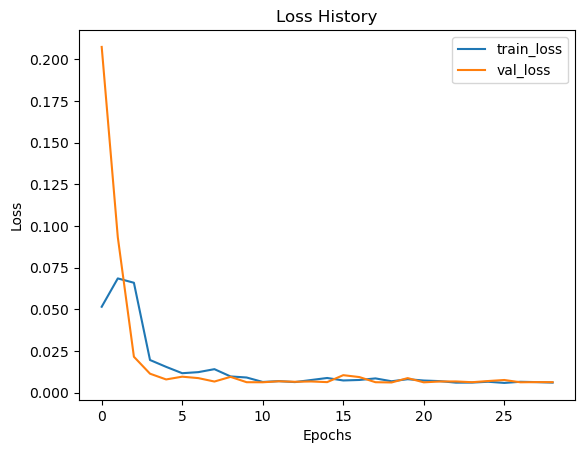

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

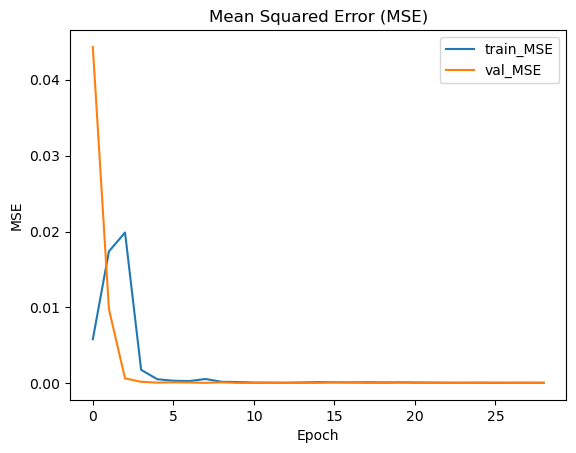

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

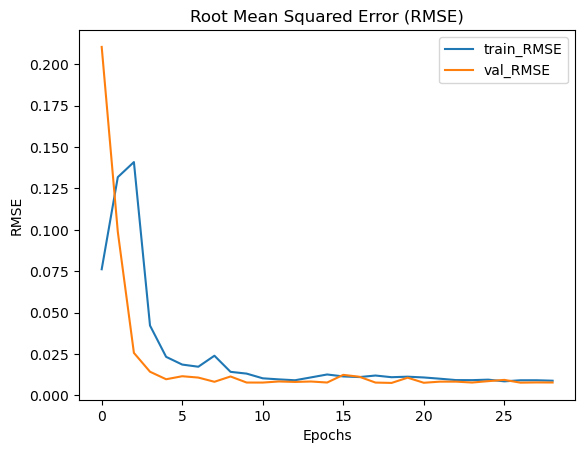

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

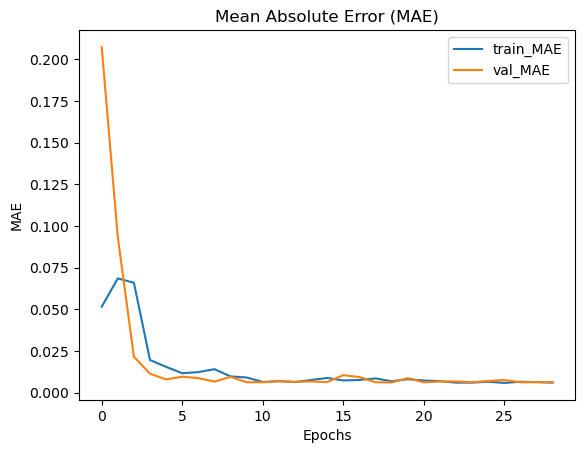

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

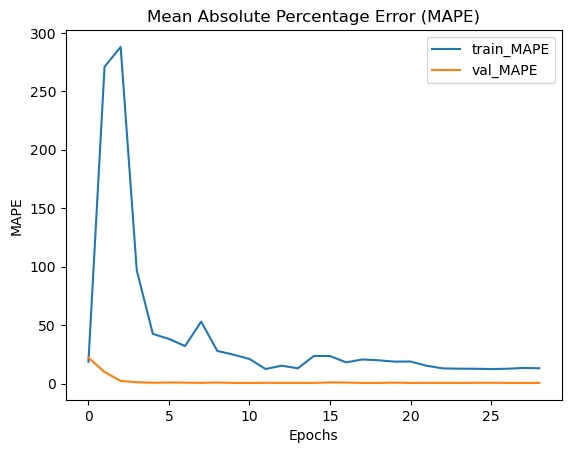

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 19:10:32.760149: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 3)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


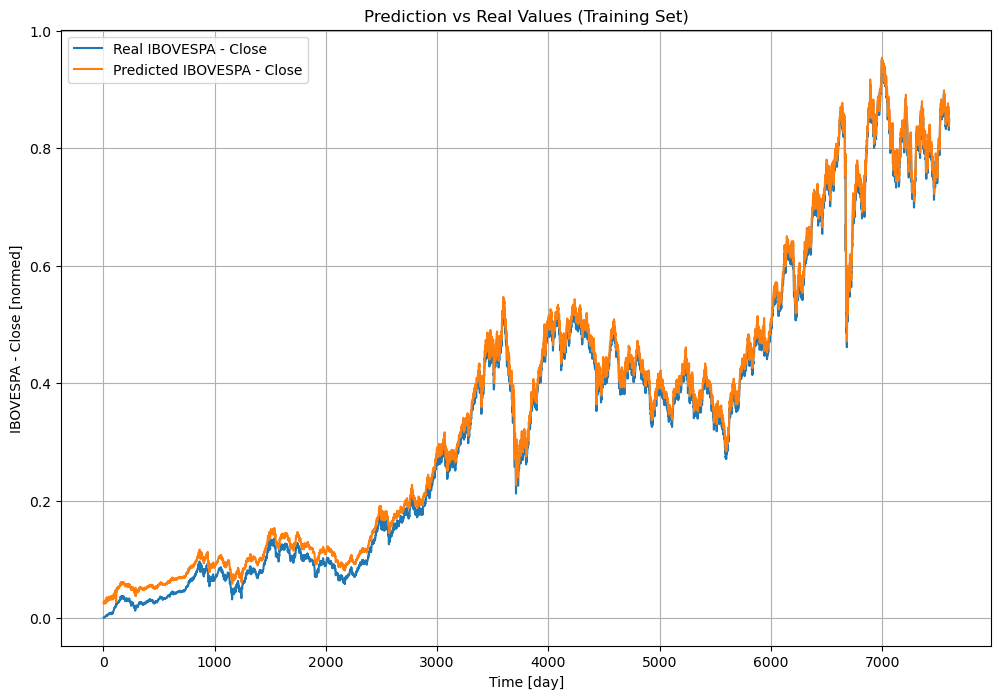

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 3)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


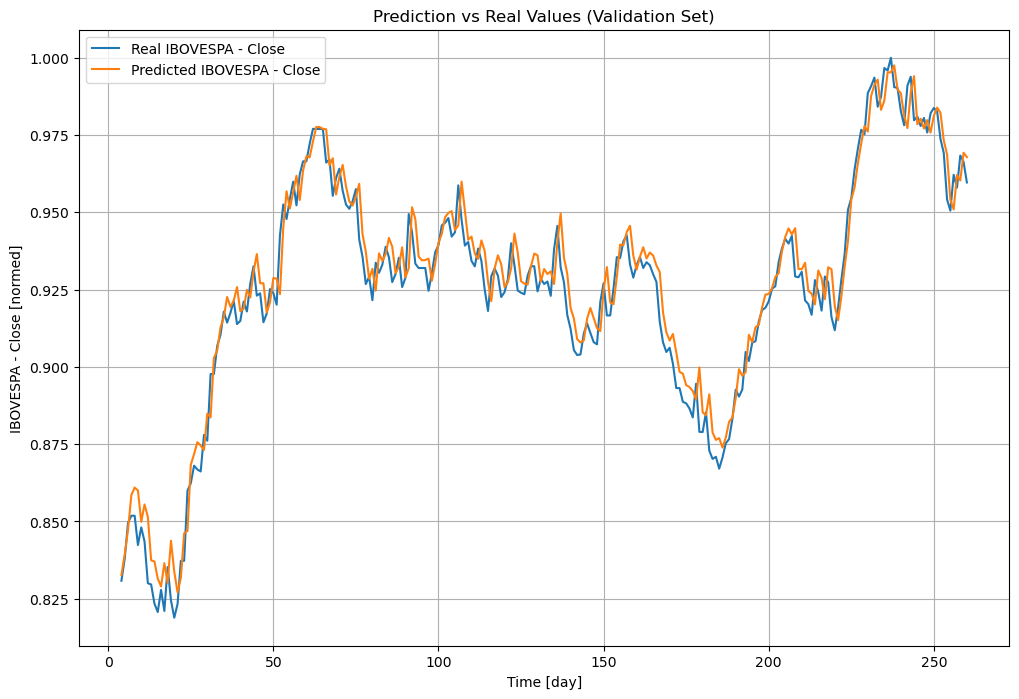

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 3)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


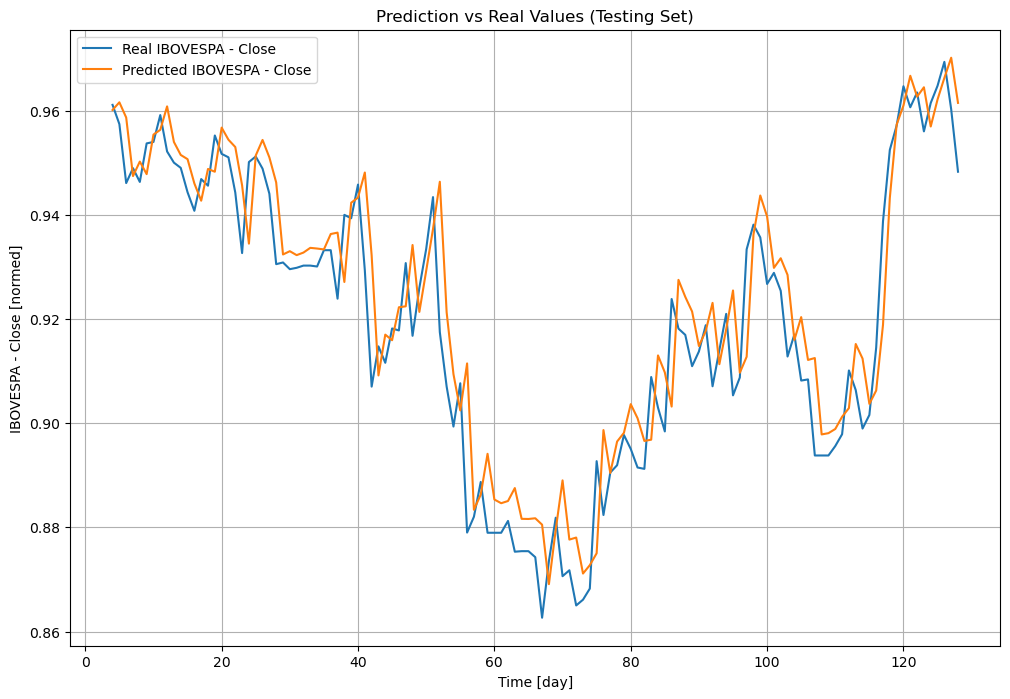

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

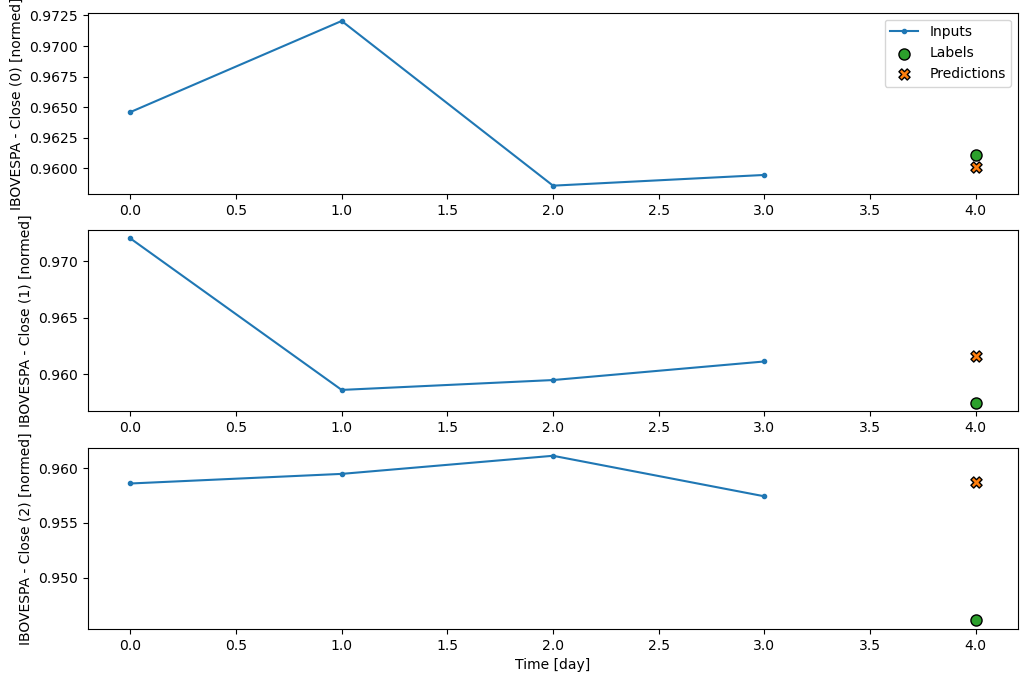

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:45s:804ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[[0.9601351 , 0.9601351 , 0.9601351 , ..., 0.9601351 ,
         0.9601351 , 0.9601351 ]],

       [[0.96160734, 0.96160734, 0.96160734, ..., 0.96160734,
         0.96160734, 0.96160734]],

       [[0.9586855 , 0.9586855 , 0.9586855 , ..., 0.9586855 ,
         0.9586855 , 0.9586855 ]],

       ...,

       [[0.96629393, 0.96629393, 0.96629393, ..., 0.96629393,
         0.96629393, 0.96629393]],

       [[0.97016644, 0.97016644, 0.97016644, ..., 0.97016644,
         0.97016644, 0.97016644]],

       [[0.9614954 , 0.9614954 , 0.9614954 , ..., 0.9614954 ,
         0.9614954 , 0.9614954 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')